### Python Assignment 24

#### Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.



You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard),
and Fare to predict whether a passenger survived.

In [21]:
#Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

from sklearn.metrics import classification_report, confusion_matrix
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)

titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df = titanic[['Pclass', 'Sex', 'Age', 'SibSp','Parch','Survived']]
df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Survived
0,3,male,22.0,1,0,0
1,1,female,38.0,1,0,1


#### Model Building

#### Using statsmodels

In [24]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Survived      0
dtype: int64

In [32]:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode
df.Age[df.Age.isnull()] = df.Age.mean()
df.Age = df.Age.astype('int64')
# df.Sex = mode(df.Sex.astype(str)).mode[0]

In [33]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Survived    0
dtype: int64

In [41]:
# df.Sex = df.Sex.map({'male':1,'female':0})
from sklearn.preprocessing import StandardScaler

df1 = df[['Pclass', 'Sex', 'Age', 'SibSp','Parch']]
y = df['Survived']

sc = StandardScaler().fit(df1)
X = sc.transform(df1)


import statsmodels.api as sm

model = sm.Logit(y,X)
results = model.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.474668
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Sun, 01 Jul 2018   Pseudo R-squ.:                  0.2872
Time:                        00:43:10   Log-Likelihood:                -422.93
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.702e-72
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9365      0.097     -9.626      0.000      -1.127      -0.746
x2            -1.3375      0.098    -13.609      0.000      -1.530      -1.145
x3            -0.4970      0.097     -5.102      0.000      -0.688      -0.306
x4            -0.3233      0.108     -3.007      0.003      -0.534      -0.113
x5            -0.0889      0.093     -0.959      0.338      -0.271       0.093
==============================================================================
"""

#### Using sklearn

In [42]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=2)

lgr = LogisticRegression()
lgr.fit(train_x,train_y)
lgr.score(train_x,train_y)

0.8089887640449438

In [45]:
# Lets calculate the accuracy

pred = lgr.predict(test_x)
res = metrics.accuracy_score(test_y, pred)
print('Accuracy:', res)

Accuracy: 0.757462686567


In [48]:
# Find AUC Value
probs = lgr.predict_proba(test_x)
auc = metrics.roc_auc_score(test_y,probs[:,1])
print('AUC:',auc)

AUC: 0.826649305556


In [56]:
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

[[134  26]
 [ 39  69]]
             precision    recall  f1-score   support

          0       0.77      0.84      0.80       160
          1       0.73      0.64      0.68       108

avg / total       0.76      0.76      0.75       268



In [53]:
# Use Crossvalidation & GridsearchCV
lgr2 = LogisticRegression()
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=10, random_state=3)
scr = cross_val_score(lgr2, X,y, scoring='accuracy',cv=kfold)
print('Mean CV Score:',scr.mean())

Mean CV Score: 0.783370786517


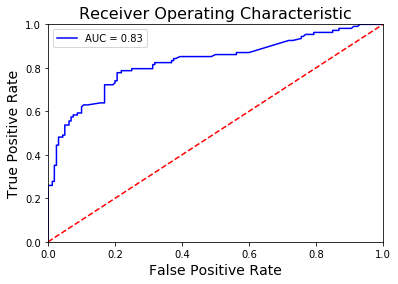

In [64]:
#### Plot AUC-ROC Curve

probs = lgr.predict_proba(test_x)
preds = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(test_y,preds)
auc5 = metrics.auc(fpr,tpr)

plt.title('Receiver Operating Characteristic',size=16)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc5)
plt.legend(loc = 'top left')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate',size=14)
plt.xlabel('False Positive Rate',size=14)
plt.show()